## About the data

The data I am using is imported from UCI Machine Learning Repository. 
I will be performing data analytics on an Automobile Dataset.

### Link to the original Dataset:
https://archive-beta.ics.uci.edu/ml/datasets/automobile

## Table of contents
(All Links are clickable and will take you directly to the topic)

1. [Data Wrangling](#datawrangling)
    * [Dealing with missing data](#missing)
    * [Data Standardisation](#standardization)
    

2. [Data Analysis](#datanalysis)
    * [P-Value](#pvalue)
    * [ANOVA](#anova)
    
    
3. [Model Development](#model)
    * [Simple Linear Regression](#slr)
    * [Multiple Linear Regression](#mlr)
    * [Polynomial Regression](#poly)
    * [Pipeline](#pipe)
    * [Accuracy of models with R^2 and MSE](#accuracy)
    * [Conclusion](#conclusion)
    
    
4. [Model Evaluation and Refinement](#evaluation) 
    * [Training and Testing](#traintest)
    * [Cross Validation Score](#cross)
    * [Model Selection](#selection)
    * [Ridge Regression](#Ridge)
    * [Grid Search](#grid)
    
    
5. [Author](#author)

### Importing Data

In [1]:
#importing libraries
import pandas as pd
import numpy as np

In [2]:
path = r"C:\Users\Rick\Downloads\auto.csv"
df = pd.read_csv(path, header = None)

In [3]:
df.shape

(205, 26)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [5]:
#creating a list of headers for the column names
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

df.columns = headers
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

# Data Wrangling <a name = "datawrangling"></a>

In [7]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


####  Replacing '?' with 'NaN'

In [8]:
df.replace("?", np.nan, inplace = True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


####  Counting missing values in each column

In [9]:
for col in df:
    Missing = df[col].isnull().value_counts()
    if True in Missing:
        print(Missing, "\n")

False    164
True      41
Name: normalized-losses, dtype: int64 

False    203
True       2
Name: num-of-doors, dtype: int64 

False    201
True       4
Name: bore, dtype: int64 

False    201
True       4
Name: stroke, dtype: int64 

False    203
True       2
Name: horsepower, dtype: int64 

False    203
True       2
Name: peak-rpm, dtype: int64 

False    201
True       4
Name: price, dtype: int64 



### Dealing with Missing Data <a name="missing"></a>

#### Replacing by mean
Columns: normalized-losses, stroke, bore, horsepower, peak-rpm

#### Replacing by frequency
Columns: num-of-doors (This will be either 4 or 2)

#### Dropping the rows
Since price is my target variable, i will drop the missing rows





###### normalised-losses

In [10]:
avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)

###### stroke

In [11]:
avg_stroke = df["stroke"].astype("float").mean(axis = 0)
df['stroke'].replace(np.nan, avg_stroke, inplace = True)

###### bore

In [12]:
avg_bore=df['bore'].astype('float').mean(axis=0)
df["bore"].replace(np.nan, avg_bore, inplace=True)

###### horsepower

In [13]:
avg_horsepower = df['horsepower'].astype('float').mean(axis=0)
df['horsepower'].replace(np.nan, avg_horsepower, inplace=True)

###### peak-rpm

In [14]:
avg_peakrpm=df['peak-rpm'].astype('float').mean(axis=0)
df['peak-rpm'].replace(np.nan, avg_peakrpm, inplace=True)

###### num of doors

In [15]:
df['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

In [16]:
df['num-of-doors'].replace(np.nan, "four", inplace = True)

###### Dropping missing rows of price column

In [17]:
df.dropna(subset=['price'], axis = 0, inplace = True)
df.reset_index(drop=True, inplace = True)

### Re-Checking if any null value exists

In [18]:
for col in df:
    Missing = df[col].isnull().value_counts()
    if True in Missing:
        print(Missing, "\n")

#### Checking Data Format

In [19]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [20]:
df[['bore', 'stroke', "peak-rpm", 'price', 'horsepower']] = df[['bore', 'stroke', 'peak-rpm', 'price', 'horsepower']].astype("float")
df[['normalized-losses']] = df[['normalized-losses']].astype("int") 

In [21]:
df.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

### Data Standardization <a name="standardization"></a>

There is a column called highway-mpg and city-mpg. We don't follow 'mpg' unit outside USA. The Standard Unit is 'Kilometers per liter'. I will convert it into KMPL instead.

Formula: 1 Kmpl = 2.3521458 mpg

In [22]:
df['city-kmpl'] = df['city-mpg'] / 2.3521458
df['highway-kmpl'] = df['highway-mpg'] / 2.3521458
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-kmpl,highway-kmpl
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,8.928018,11.478880
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,8.928018,11.478880
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,8.077731,11.053737
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,10.203449,12.754311
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,7.652587,9.353162


In [23]:
df.drop(['city-mpg', 'highway-mpg'], axis = 1, inplace = True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,price,city-kmpl,highway-kmpl
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,13495.0,8.928018,11.478880
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,16500.0,8.928018,11.478880
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,16500.0,8.077731,11.053737
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,13950.0,10.203449,12.754311
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,17450.0,7.652587,9.353162


# Data Analysis <a name="datanalysis"></a>

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [25]:
#Finding the correlation between the different variables
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,price,city-kmpl,highway-kmpl
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008153,-0.182196,0.075819,0.279740,-0.082391,-0.035527,0.036233
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055045,-0.114713,0.217299,0.239543,0.133999,-0.225016,-0.181877
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158018,0.250313,0.371147,-0.360305,0.584642,-0.470606,-0.543304
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.123952,0.159733,0.579821,-0.285970,0.690628,-0.665192,-0.698142
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188822,0.189867,0.615077,-0.245800,0.751265,-0.633531,-0.680635
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.060663,0.259737,-0.087027,-0.309974,0.135486,-0.049800,-0.104812
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167438,0.156433,0.757976,-0.279361,0.834415,-0.749543,-0.794889
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.205928,0.028889,0.822676,-0.256733,0.872335,-0.650546,-0.679571
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,0.543155,-0.582027,-0.591309
stroke,-0.008153,0.055045,0.158018,0.123952,0.188822,-0.060663,0.167438,0.205928,-0.055390,1.000000,0.187871,0.098267,-0.063561,0.082269,-0.033956,-0.034636


<AxesSubplot:xlabel='width', ylabel='price'>

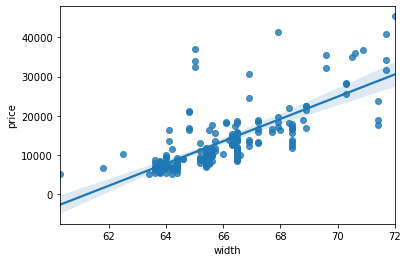

In [26]:
sns.regplot(x='width', y = 'price', data = df)

As the width of the car increases, the price goes up.

<AxesSubplot:xlabel='highway-kmpl', ylabel='price'>

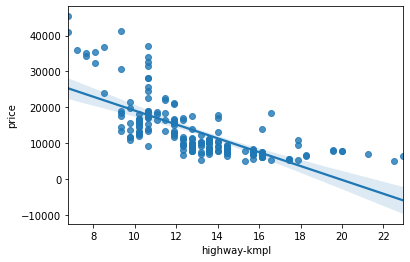

In [27]:
sns.regplot(x='highway-kmpl', y = 'price', data = df)

The more mileage a car have, the cheaper it will be. 

<AxesSubplot:xlabel='engine-location', ylabel='price'>

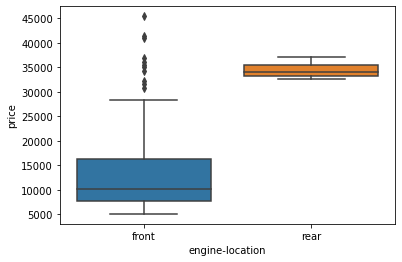

In [28]:
sns.boxplot(x='engine-location', y = 'price', data = df)

Engine Location is a big predictor of price. We see car with rear engine location have a very high price. 

In [29]:
df.corr().iloc[:, -3]

symboling           -0.082391
normalized-losses    0.133999
wheel-base           0.584642
length               0.690628
width                0.751265
height               0.135486
curb-weight          0.834415
engine-size          0.872335
bore                 0.543155
stroke               0.082269
compression-ratio    0.071107
horsepower           0.809575
peak-rpm            -0.101616
price                1.000000
city-kmpl           -0.686571
highway-kmpl        -0.704692
Name: price, dtype: float64

### P-value <a name="pvalue"></a>

In [30]:
from scipy import stats

P value shows if two values are statistically significant. 


P value < 0.001: Strong significant
    
P Valye < 0.05: Moderate Significant

In [31]:
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("Horsepower \n""Pearson Coef: ", pearson_coef, " P value: ", p_value)

Horsepower 
Pearson Coef:  0.809574567003656  P value:  6.369057428259557e-48


In [32]:
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print("Bore \n""Pearson Coef: ", pearson_coef, " P value: ", p_value)

Bore 
Pearson Coef:  0.5431553832626602  P value:  8.049189483935489e-17


In [33]:
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("Engine Size \n""Pearson Coef: ", pearson_coef, " P value: ", p_value)

Engine Size 
Pearson Coef:  0.8723351674455185  P value:  9.265491622198389e-64


###  ANOVA: Analysis of Variance <a name="anova"></a>

To test whether two or more groups are significant. It returns two parameters:

F test score and P Value. 


#### It is expected to get high F test score and small P Value to determine strong correlation
    

In [34]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [35]:
df_wheel_group = df[['drive-wheels','body-style' , 'price']]
df_wheel_group.head()

,drive-wheels,body-style,price
0,rwd,convertible,13495.0
1,rwd,convertible,16500.0
2,rwd,hatchback,16500.0
3,fwd,sedan,13950.0
4,4wd,sedan,17450.0


In [36]:
grouped_test = df_wheel_group[['drive-wheels', 'price']].groupby(['drive-wheels'])
grouped_test.head(1)

,drive-wheels,price
0,rwd,13495.0
3,fwd,13950.0
4,4wd,17450.0


In [37]:
grouped_test.get_group('4wd')['price']

4      17450.0
136     7603.0
140     9233.0
141    11259.0
144     8013.0
145    11694.0
150     7898.0
151     8778.0
Name: price, dtype: float64

In [38]:
# ANOVA
f_val, p_val = stats.f_oneway(grouped_test.get_group('fwd')['price'],
                              grouped_test.get_group('rwd')['price'],
                              grouped_test.get_group('4wd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 67.95406500780399 , P = 3.3945443577151245e-23


A high F test score and low P value suggests a strong correlation

# Model Development <a name="model"></a>

###  Simple linear Regression <a name="slr"></a>

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
lm = LinearRegression()
lm

LinearRegression()

#### Predicitng Car Price with highway KMPL

In [41]:
X = df[['highway-kmpl']]
Y = df['price']
lm.fit(X, Y)

LinearRegression()

In [42]:
yhat = lm.predict(X)
yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [43]:
lm.intercept_

38423.30585815739

In [44]:
lm.coef_

array([-1932.83671454])

#### Estimated Linear Model
Price = 38423.31 - 821.73 x highway-kmpl


### Residual Plot

if the points in a residual plot are randomly spread out around the X - axis , then a linear model is the appropriate.

Visualising the Simple Linear Regression

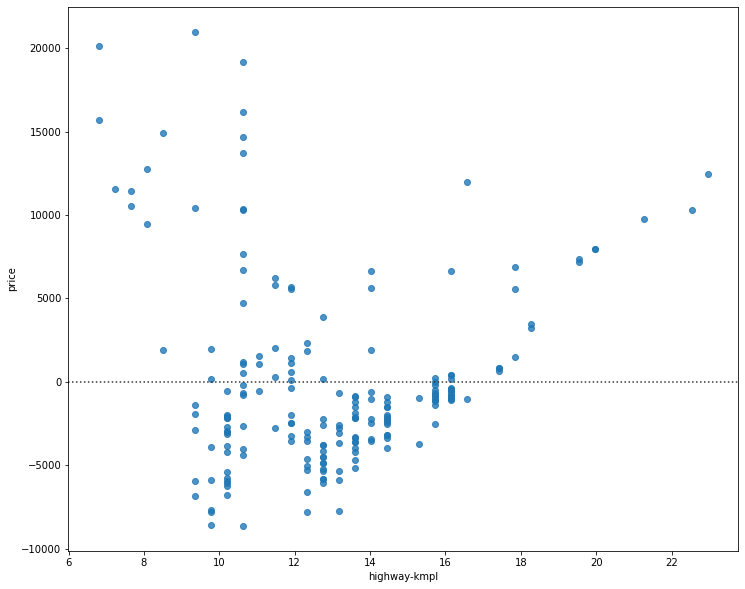

In [45]:
plt.figure(figsize=(12, 10))
sns.residplot(x='highway-kmpl', y = 'price', data = df)
plt.show()

The residuals aren't randomly spread out. This suggests a non linear model is appropriate for the date

### Multiple Linear Regression <a name="mlr"></a>

In [46]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-kmpl']]

In [47]:
lm.fit(Z, Y)

LinearRegression()

In [48]:
lm.intercept_

-15806.624626329212

In [49]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 84.81247088])

#### Estimated Linear Model
Price = -15806.62 + 53.5 x horsepower + 4.7 x curb-weight + 81 x engine-size + 84.81 x highway-kmpl

### Distribution Plot

Visualising the Multiple Linear Regression

In [50]:
yHat = lm.predict(Z)

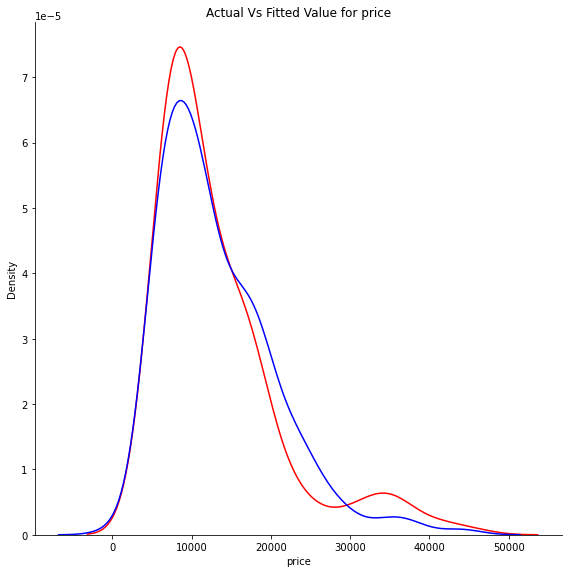

In [51]:
ax1 = sns.displot(data = df,x="price", color = "r",height=8, kind="kde", label="Acutal Value")
sns.kdeplot(data = df, x= yHat, color= "b", ax=ax1, label = "Fitted Value")

plt.title("Actual Vs Fitted Value for price")
plt.show()


The fitted values are quite close but i can try some other models

###  Polynomial Regression <a name="poly"></a>

In [52]:
x = df['highway-kmpl']
y = df['price']

f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3        2
-20.26 x + 1133 x - 2.109e+04 x + 1.379e+05


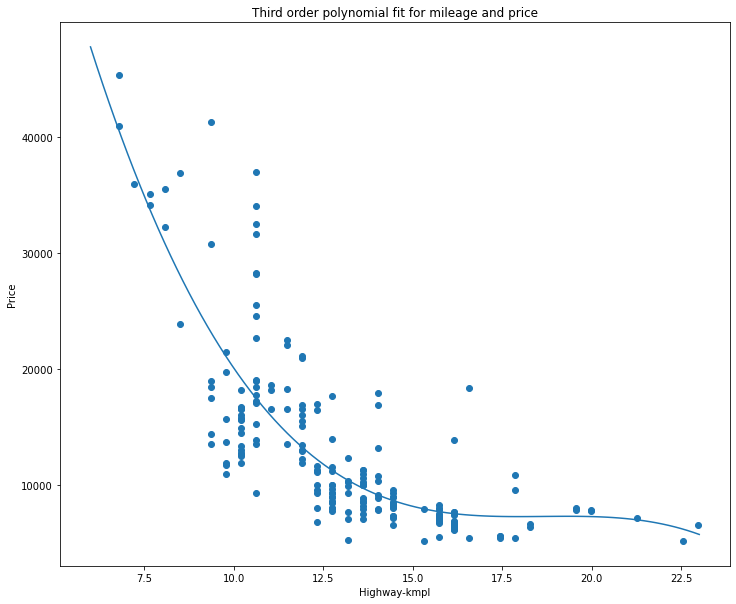

In [53]:
model = np.linspace(6, 23, 100)

plt.figure(figsize=(12, 10))
plt.scatter(x,y)
plt.plot(model, p(model))

plt.title('Third order polynomial fit for mileage and price')
plt.xlabel('Highway-kmpl')
plt.ylabel('Price')
plt.show()

looks good!

###  11 order Polynomial Model 

In [54]:
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)

            11           10         9         8        7             6
-0.0001515 x  + 0.02448 x  - 1.769 x + 75.48 x - 2110 x + 4.055e+04 x
              5             4             3             2
 - 5.464e+05 x + 5.156e+06 x - 3.338e+07 x + 1.412e+08 x - 3.507e+08 x + 3.879e+08


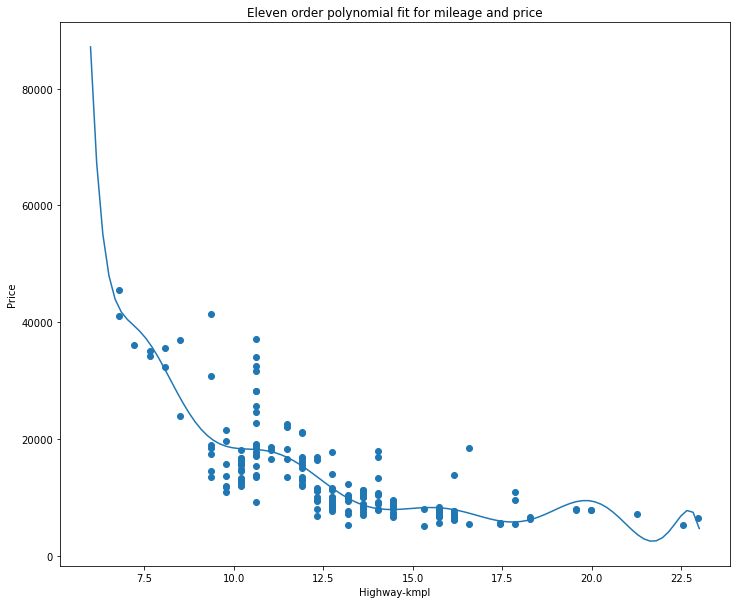

In [55]:
model = np.linspace(6, 23, 100)
plt.figure(figsize=(12, 10))
plt.scatter(x,y)
plt.plot(model, p1(model))
plt.title('Eleven order polynomial fit for mileage and price')
plt.xlabel('Highway-kmpl')
plt.ylabel('Price')
plt.show()

Performing a polynomial transform on multiple features. I will also create an object of degree = 2.

In [56]:
from sklearn.preprocessing import PolynomialFeatures

In [57]:
pr = PolynomialFeatures(degree = 2)
Z_pr = pr.fit_transform(Z)
Z.shape

(201, 4)

In [58]:
Z_pr.shape

(201, 15)

### Pipeline <a name="pipe"></a>

Data Pipelines simplify the steps of processing the data.
Modules used: Pipeline and StandardScaler

In [59]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

Now i will create a list of tuple which will have the name of the model or estimator and it's corresponding constructor

In [60]:
Input = [('scale', StandardScaler()),
         ('polynomial', PolynomialFeatures(include_bias = False)),
         ('model', LinearRegression())]

In [61]:
pipe = Pipeline(Input)
Z = Z.astype(float)
pipe.fit(Z, y)
pipe.score(Z, y)

0.8463341969864728

In [62]:
ypipe = pipe.predict(Z)
ypipe[0:5]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555,
       16136.29619164])

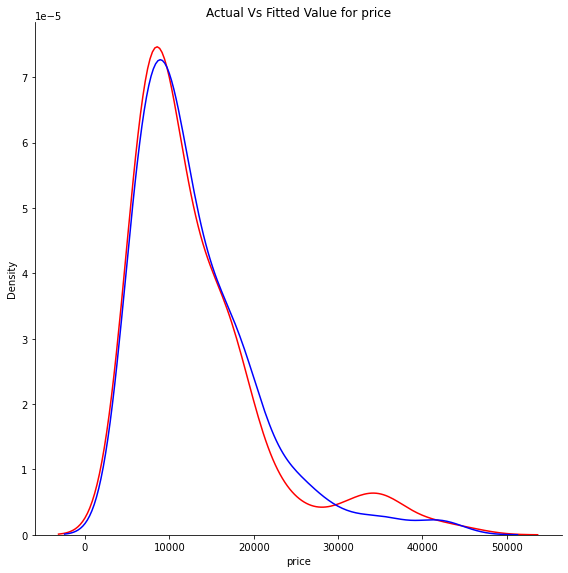

In [63]:
ax1 = sns.displot(data = df,x="price", color = "r",height=8, kind="kde", label="Acutal Value")
sns.kdeplot(data = ypipe, color= "b", ax=ax1, label = "Fitted Value")

plt.title("Actual Vs Fitted Value for price")
plt.show()

### Accuracy of models <a name="accuracy"></a>

##### R Squared
a.k.a Coefficient of Determintation: How close the data is the fitted line


#### MSE
Mean Squared Error: Avg. of the square of errors. (y - yhat)

In [64]:
from sklearn.metrics import mean_squared_error

####  Simple Linear Regression

In [65]:
lm.fit(X, Y) #X = Highway kmpl
Yhat = lm.predict(X)
mse = mean_squared_error(df['price'], Yhat)
print("R-Square: ", lm.score(X, Y), " MSE: ", mse)

R-Square:  0.4965911884339176  MSE:  31635042.944639888


#### Multiple Linear Regression

In [66]:
# Z = 'horsepower', 'curb-weight', 'engine-size', 'highway-kmpl'
lm.fit(Z, Y)
YMLfit = lm.predict(Z)
mse = mean_squared_error(df['price'], YMLfit)
print("R-Square: ", lm.score(Z, Y), " MSE: ", mse)

R-Square:  0.8093562806577457  MSE:  11980366.87072649


####  Polynomial Fit

In [67]:
from sklearn.metrics import r2_score

In [68]:
r_sq = r2_score(y, p(x))
mse = mean_squared_error(df['price'], p(x))
print("R-Square: ", r_sq, " MSE: ", mse)

R-Square:  0.6741946663906516  MSE:  20474146.42636123


### Decision Making: Determining a good model

High R-Squared and Small MSE

##### SLR
    R-Square:  0.4965911884339176  MSE:  31635042.944639888

#### MLR
    R-Square:  0.8093562806577457  MSE:  11980366.87072649

#### Poly Fit
    R-Square:  0.6741946663906516  MSE:  20474146.42636123

#  Conclusion <a name="conclusion"></a>
Comparing the three models, MLR Model have the highest R-Square and Lowest MSE. The original data had 26 variables, thus multiple variables are the best predictors of the final car price

# Model Evaluation and Refinement <a name="evaluation"></a>

#### Training and Testing <a name="traintest"></a>

In [69]:
x_data = df.select_dtypes('number')
y_data = df['price']
x_data = x_data.drop('price', axis = 1)

In [70]:
x_data.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-kmpl,highway-kmpl
0,3,122,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,8.928018,11.478880
1,3,122,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,8.928018,11.478880
2,1,122,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,8.077731,11.053737
3,2,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,10.203449,12.754311
4,2,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,7.652587,9.353162


In [71]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data,
                                   test_size = 0.25, random_state = 1)

print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 51
number of training samples: 150


In [72]:
lm.fit(x_train[['horsepower']], y_train)

test_score = lm.score(x_test[['horsepower']], y_test)
train_score = lm.score(x_train[['horsepower']], y_train)

print("Training R^2: ", train_score, " Testing R^2: ", test_score)

Training R^2:  0.661944314575708  Testing R^2:  0.6296166860021475


### Cross-Validation Score <a name="cross"></a>

In [73]:
from sklearn.model_selection import cross_val_score

Rcross = cross_val_score(lm, x_data[['horsepower']], y_data, cv = 4)
Rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

In [74]:
# Calculating AVG and Standard Deviation of the estimations

print("The mean of the folds is: ", Rcross.mean(),
      "\nThe Standard Deviation is: ", Rcross.std())

The mean of the folds is:  0.522009915042119 
The Standard Deviation is:  0.2911839444756029


In [75]:
#predicting the output

from sklearn.model_selection import cross_val_predict

yhat = cross_val_predict(lm, x_data[['horsepower']], y_data, cv = 4)
yhat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

### Model Selection <a name="selection"></a>

#### Multiple Linear Regression

In [76]:
#creating a new MLR
lm.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-kmpl']], y_train)

#Prediction using training data
yhat_train = lm.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-kmpl']])
yhat_train[0:5]                  

array([18691.26919565,  5971.55129784, 11913.93328527,  7406.99925268,
        6665.90323124])

Text(0.5, 1.0, 'Plot of predicted value using training data vs Training Data')

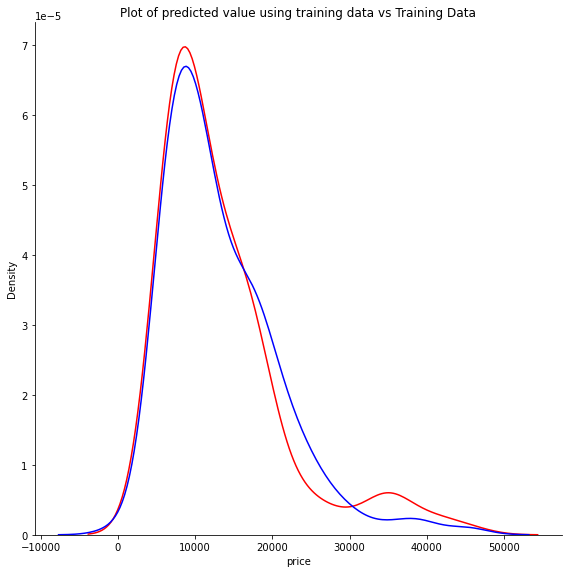

In [77]:
ax1 = sns.displot(data = y_train, color = "r",height=8, kind="kde", label="Acutal Value")
sns.kdeplot(data = yhat_train, color= "b", ax=ax1, label = "Fitted Value")
plt.title("Plot of predicted value using training data vs Training Data")

In [78]:
#prediction using testing data

yhat_test = lm.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-kmpl']])
yhat_test[0:5]

array([11476.88916858,  5995.01225232, 11347.45024298,  6869.00275689,
       15792.02354519])

Text(0.5, 1.0, 'Plot of predicted value using test data vs Testing Data')

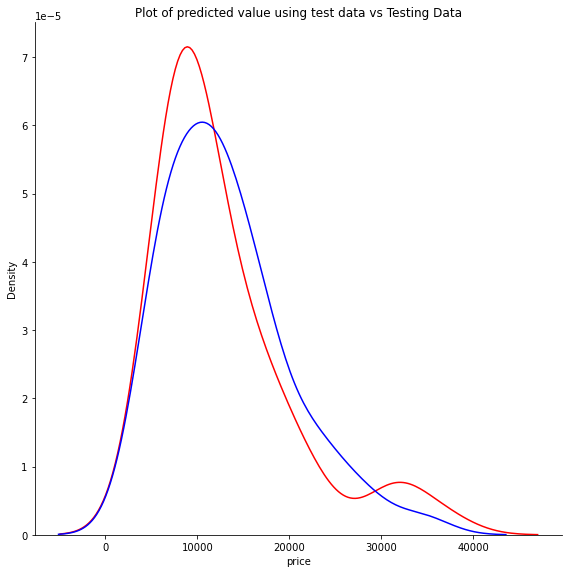

In [79]:
ax1 = sns.displot(data = y_test, color = "r",height=8, kind="kde", label="Acutal Value")
sns.kdeplot(data = yhat_test, color= "b", ax=ax1, label = "Fitted Value")
plt.title("Plot of predicted value using test data vs Testing Data")

The model seems to be doing well in learning from the training dataset but the plot of predicted value using the test data shows a different shape. 

#### Polynomial Model of degree = 3

In [80]:
pr = PolynomialFeatures(degree = 3)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=3)

In [81]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression()

In [82]:
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([11463.39266777,  7610.07057794,  9520.8744674 ,  8492.5612047 ,
       14785.78874798])

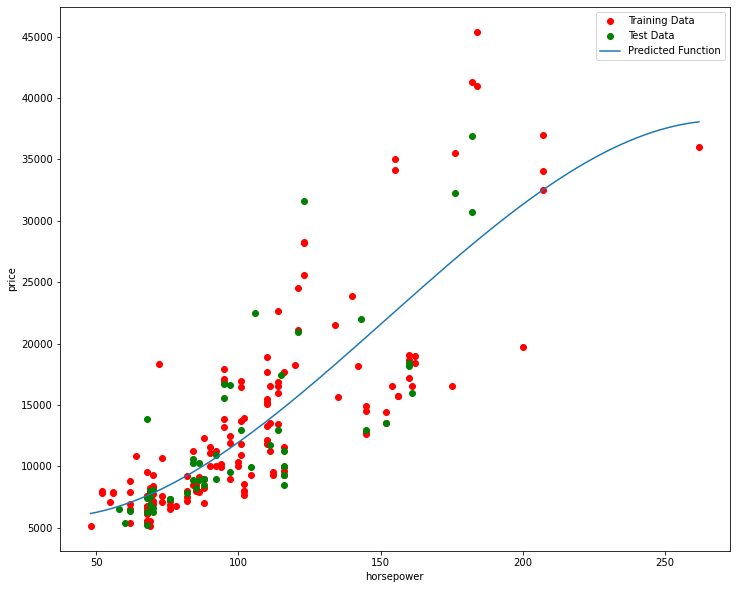

In [83]:
xmax=max([x_train[['horsepower']].values.max(), x_test[['horsepower']].values.max()])
xmin=min([x_train[['horsepower']].values.min(), x_test[['horsepower']].values.min()])
x=np.arange(xmin, xmax, 0.1)

plt.figure(figsize=(12, 10))
plt.plot(x_train[['horsepower']], y_train, 'ro', label='Training Data')
plt.plot(x_test[['horsepower']], y_test, 'go', label='Test Data')
plt.plot(x, poly.predict(pr.fit_transform(x.reshape(-1, 1))),label='Predicted Function')
plt.xlabel('horsepower')
plt.ylabel('price')
plt.legend()

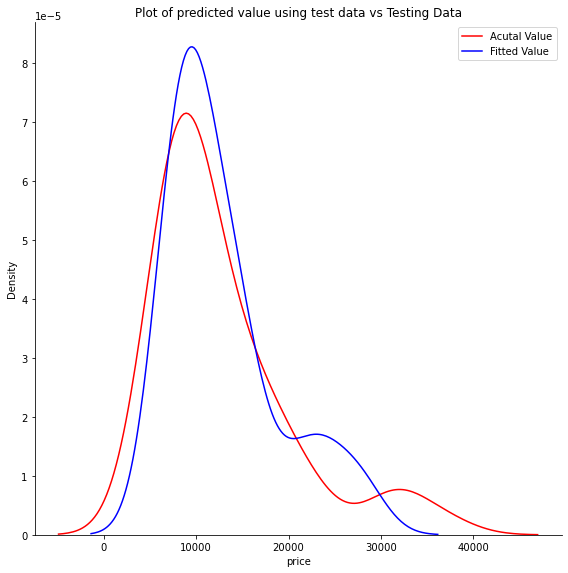

In [84]:
ax1 = sns.displot(data = y_test, color = "r",height=8, kind="kde", label="Acutal Value")
sns.kdeplot(data = yhat, color= "b", ax=ax1, label = "Fitted Value")
plt.title("Plot of predicted value using test data vs Testing Data")
plt.legend()

The predicted value is higher than actual value for cars where the price 10,000 range, conversely the predicted price is lower than the price cost in the 30,000 to 40,000 range. As such the model is not as accurate in these ranges.

In [85]:
#R^2 values:
print("R^2 of Training date: ", poly.score(x_train_pr, y_train), 
      "\nR^2 of Testing data: ", poly.score(x_test_pr, y_test))


R^2 of Training date:  0.6704311337102868 
R^2 of Testing data:  0.6325477723157998


### Ridge Regression <a name="Ridge"></a>

This is to test how the parameter alpha changes the models

In [86]:
from sklearn.linear_model import Ridge

In [87]:
pr = PolynomialFeatures(degree = 2)
x_train_pr = pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-kmpl','normalized-losses','symboling']])
x_test_pr = pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-kmpl','normalized-losses','symboling']])

In [88]:
RModel= Ridge(alpha = 10)
RModel.fit(x_train_pr, y_train)

Ridge(alpha=10)

In [89]:
yhat = RModel.predict(x_test_pr)

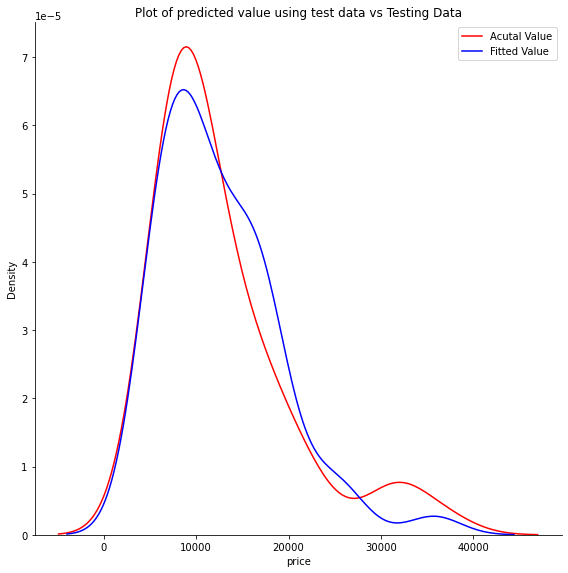

In [90]:
ax1 = sns.displot(data = y_test, color = "r",height=8, kind="kde", label="Acutal Value")
sns.kdeplot(data = yhat, color= "b", ax=ax1, label = "Fitted Value")
plt.title("Plot of predicted value using test data vs Testing Data")
plt.legend()

### Grid Search <a name="grid"></a>

The term alpha is a hyperparameter. Sklearn has the class GridSearchCV to make the process of finding the best hyperparameter simpler.

In [91]:
from sklearn.model_selection import GridSearchCV

In [92]:
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
RR = Ridge()
grid = GridSearchCV(RR, parameters1, cv=4)

In [93]:
grid.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-kmpl']], y_data)
best = grid.best_estimator_
best

Ridge(alpha=10000)

In [94]:
best.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-kmpl']], y_test)

0.791750129018015

So the best value for Alpha is 10,000. let's plot

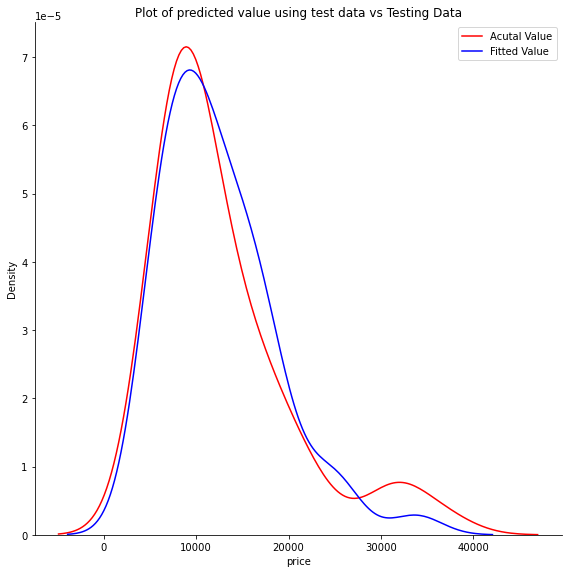

In [95]:
RModel= Ridge(alpha = 10000)
RModel.fit(x_train_pr, y_train)
yhat = RModel.predict(x_test_pr)
ax1 = sns.displot(data = y_test, color = "r",height=8, kind="kde", label="Acutal Value")
sns.kdeplot(data = yhat, color= "b", ax=ax1, label = "Fitted Value")
plt.title("Plot of predicted value using test data vs Testing Data")
plt.legend()

#  Author <a name="author"></a>
## [Debarshi Biswas](https://github.com/RickyDonne) 
#### 2022